In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [8]:
dff = pd.read_csv(r'C:\Users\mirza\Desktop\datasets\energy.csv')


In [9]:
dff

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
995,2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5,Off,Off,21.194696,Saturday,No,82.306692
996,2022-02-11 12:00:00,23.836647,47.256435,1705.235156,4,Off,On,25.748176,Tuesday,Yes,66.577320
997,2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6,Off,On,0.297079,Friday,Yes,72.753471
998,2022-02-11 14:00:00,25.138365,31.306459,1309.079719,3,On,Off,20.425163,Thursday,Yes,76.950389


In [10]:
dff.shape

(1000, 11)

In [11]:
dff.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [12]:
dff['Timestamp'] = pd.to_datetime(dff['Timestamp'], utc =True, infer_datetime_format=True)
dff = dff.set_index('Timestamp')
dff.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-01-01 00:00:00+00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
2022-01-01 01:00:00+00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2022-01-01 02:00:00+00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
2022-01-01 03:00:00+00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
2022-01-01 04:00:00+00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [13]:
def plot_series(df=None, col=None, series=pd.Series([]),
                label=None, title=None, ylabel=None, start=0, end=None):
    
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=25)

    if col:
        ax.plot(df[col][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=25)

    if not series.empty:
        ax.plot(series[start:end], label=label)

    if label:
        ax.legend(fontsize=15)
    if title:
        ax.set_title(title, fontsize=25)

    ax.grid(True)
    
    plt.show()
    return ax


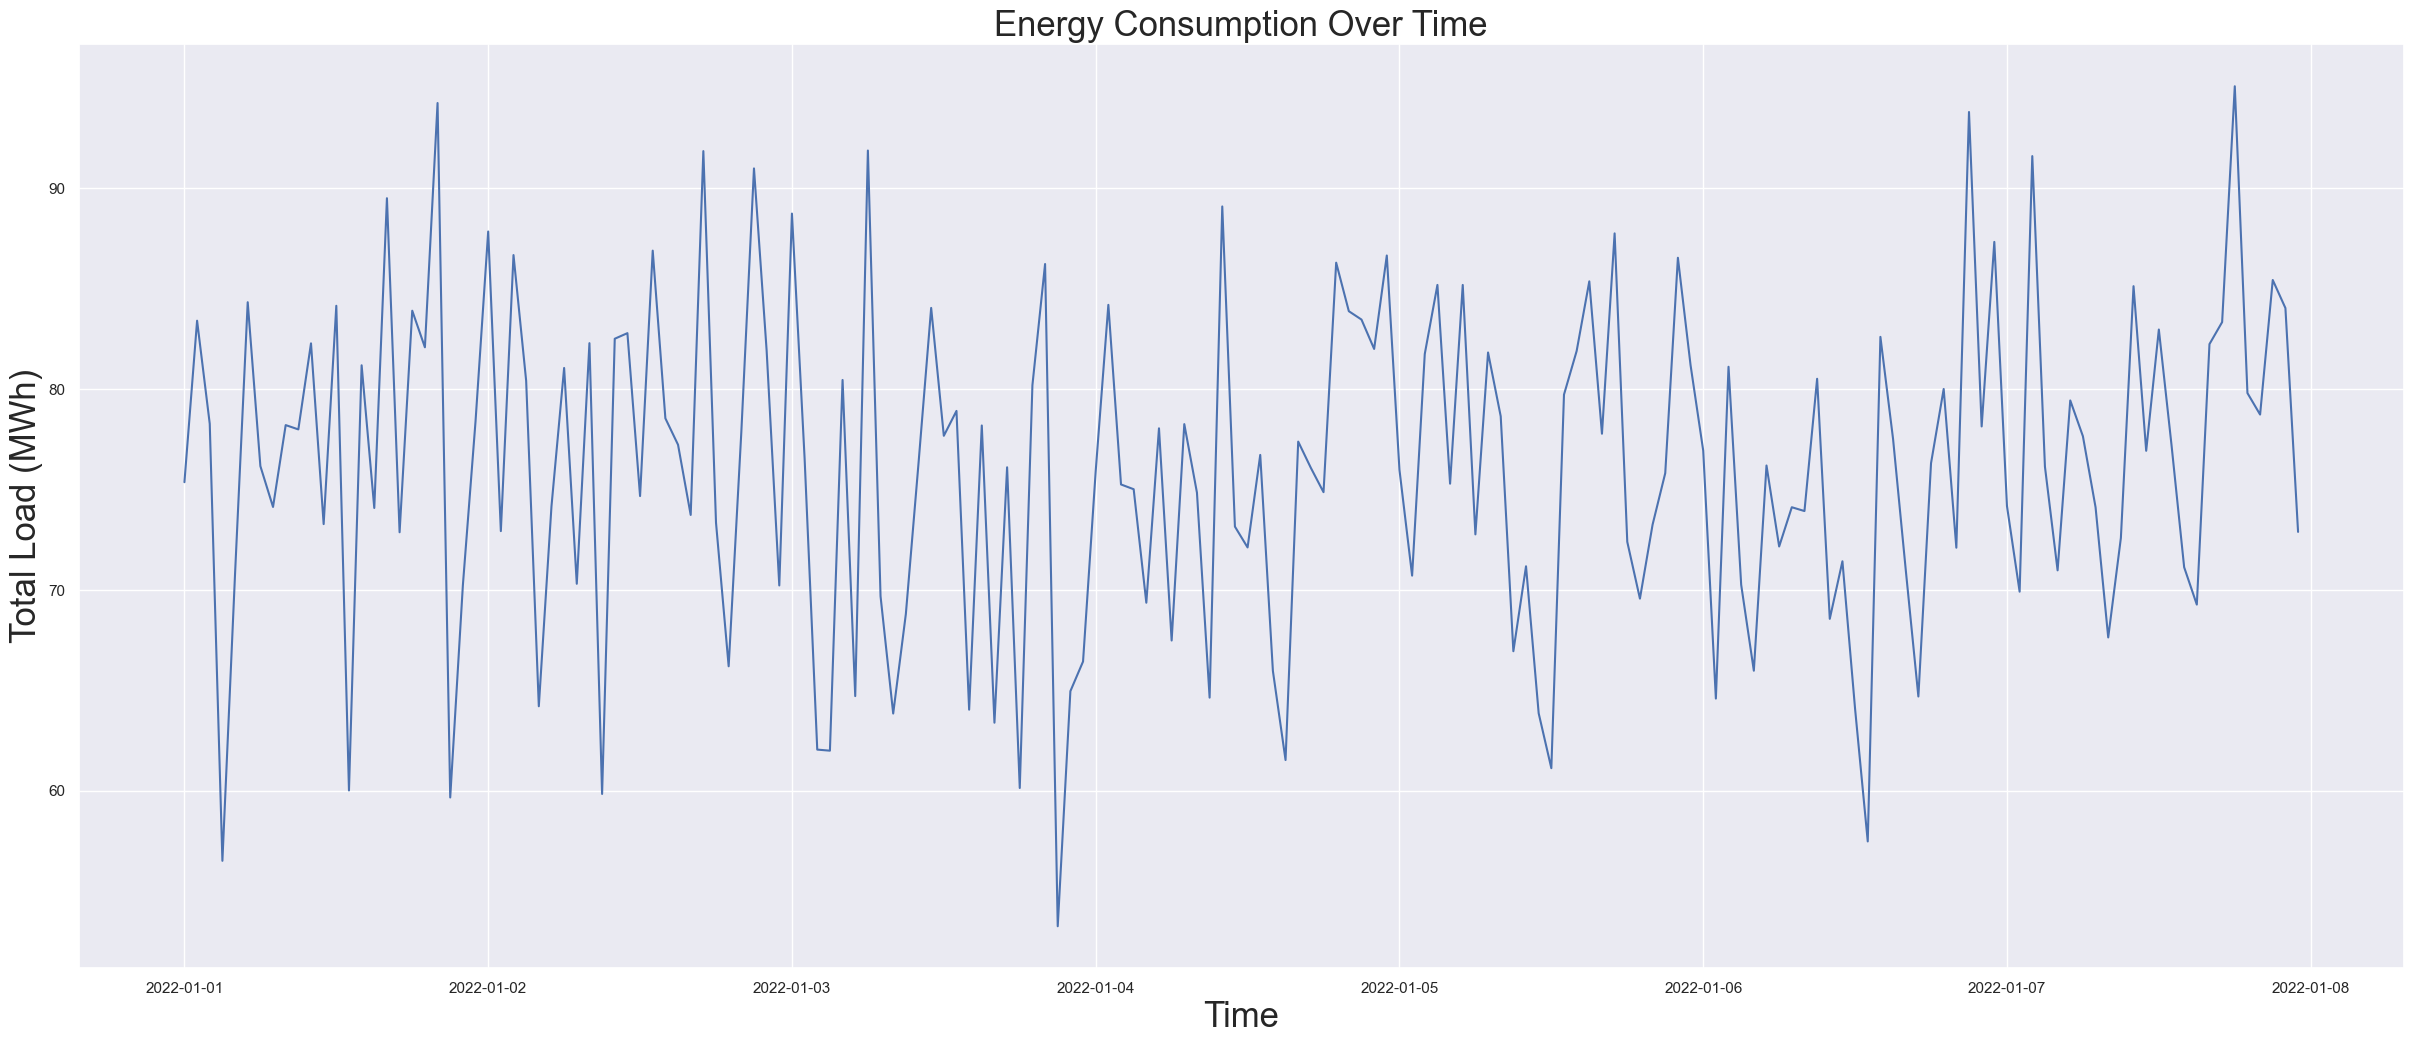

In [14]:
ax = plot_series(
    df=dff,
    col='EnergyConsumption',
    ylabel='Total Load (MWh)',
    title='Energy Consumption Over Time',
    end=24*7
)
plt.show()


In [15]:
# def plot_series(df=None, column = None, series= pd.Series([]),
#                 label= None,
#                 ylabel= None,
#                 titie=None,
#                 start=0,
#                 end= None):
#     sns.set()
#     fig, ax = plt.subplots(figsize=(30,15))
#     ax=set_xlabel("Time", frontsize=25)
#     if col:
#         ax.plot(df[col][start:end], label= label)
#         ax.set_ylabel(ylabel, fontsize=25)
#     if not series.any():
#         ax.plot(series[start:end], label=label)
       
#     if label:
#         ax.legend(fontsize=15)
#     if title:
#         ax.set_title(title, fontsize=25)
#     ax.grid(True)
#     return ax
# plt.show()

In [16]:
# ax = plot_series(
#     df=dff,
#     col= 'EnergyConsumption',
#     ylabel='Total Load (MWh)',
#     title='Energy Consumption Over Time',
#     end=24*7
# )
# # plt.show()


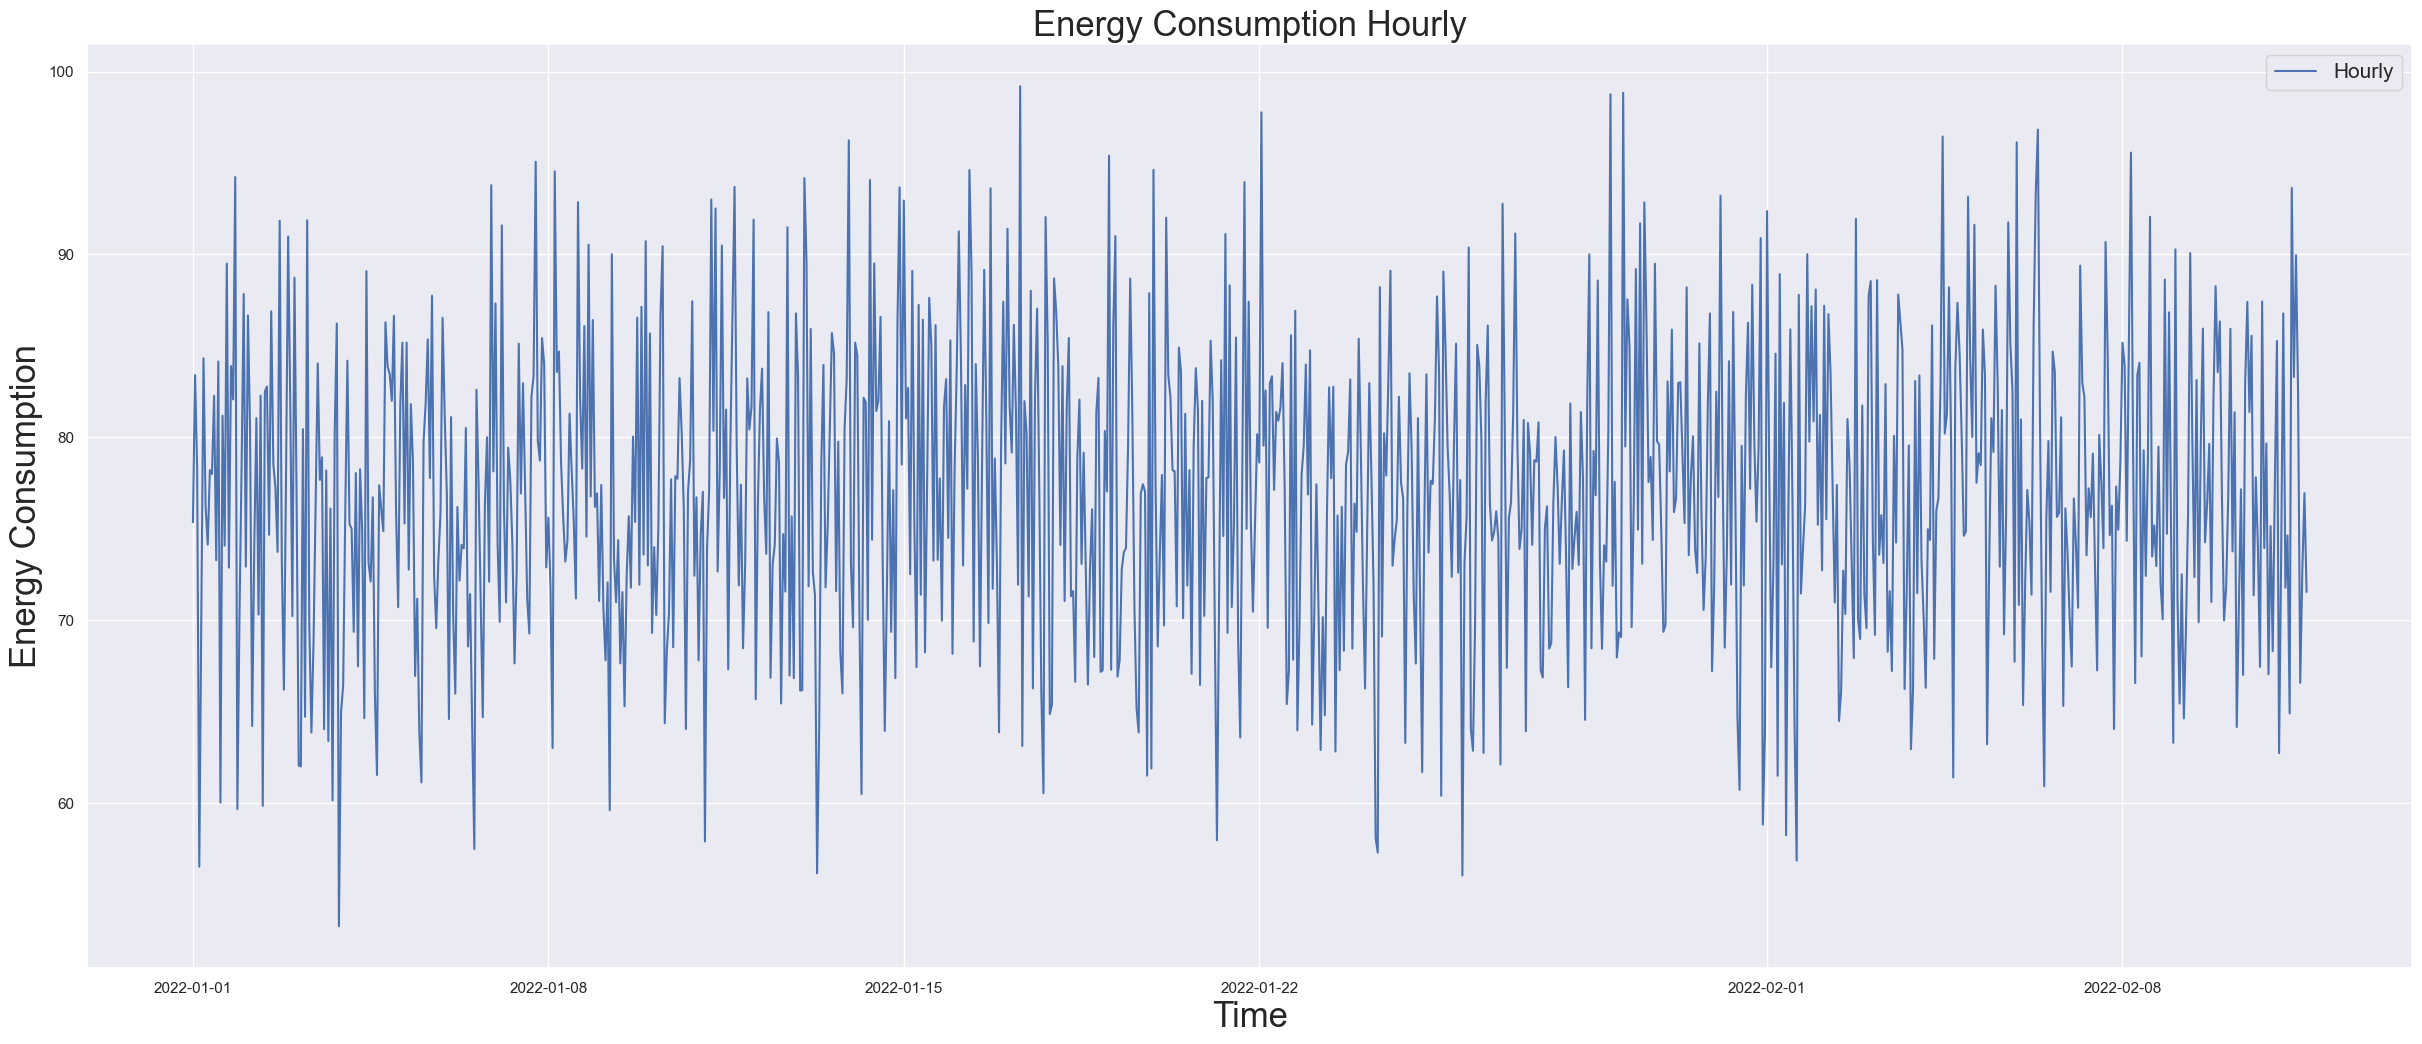

In [17]:
rolling = dff['EnergyConsumption'].rolling(24, center=True).mean()

ax = plot_series(dff, 'EnergyConsumption',
                label='Hourly', ylabel='Energy Consumption',
                title='Energy Consumption Hourly')

ax.plot(rolling, linestyle='-',
        linewidth=2,
        label='Weekly rolling mean')

plt.show()

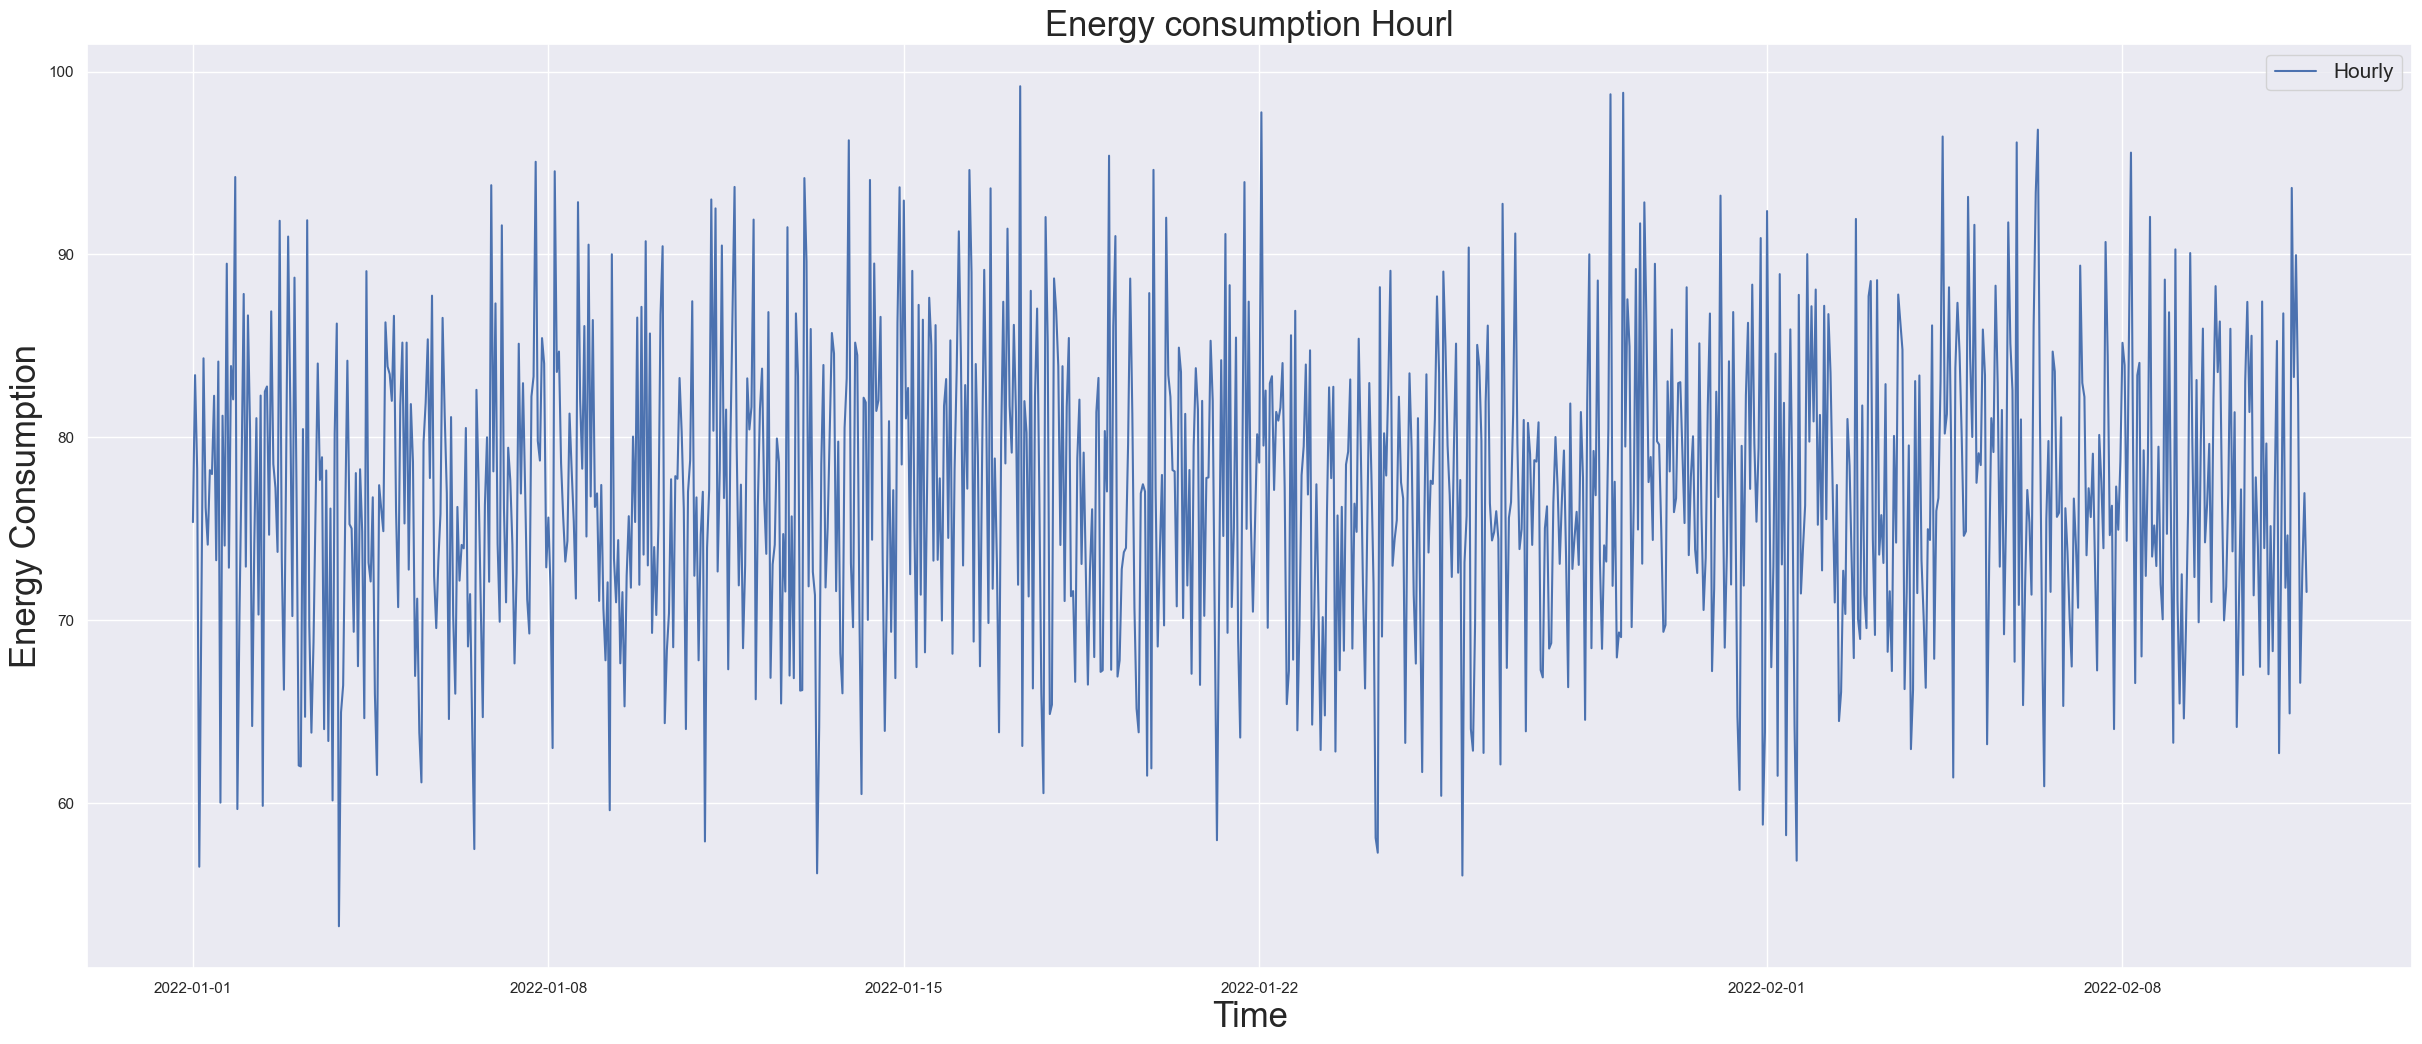

In [18]:
rolling = dff['EnergyConsumption'].rolling(24, center= True).mean()
ax =plot_series(dff, 'EnergyConsumption',
                label='Hourly',
                ylabel= 'Energy Consumption',
                title= 'Energy consumption Hourl')

plt.show()

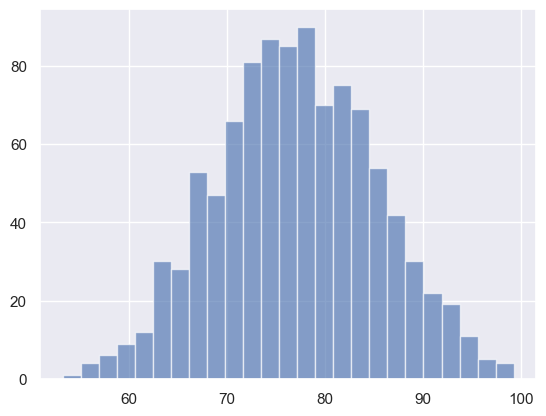

In [19]:

# ax = dff['EnergyConsumption'].plot.hist(bins=25, alpha=0.65)
# plt.show()

ax = plt.hist(x= 'EnergyConsumption', data=dff, bins=25, alpha=0.65)
plt.show()

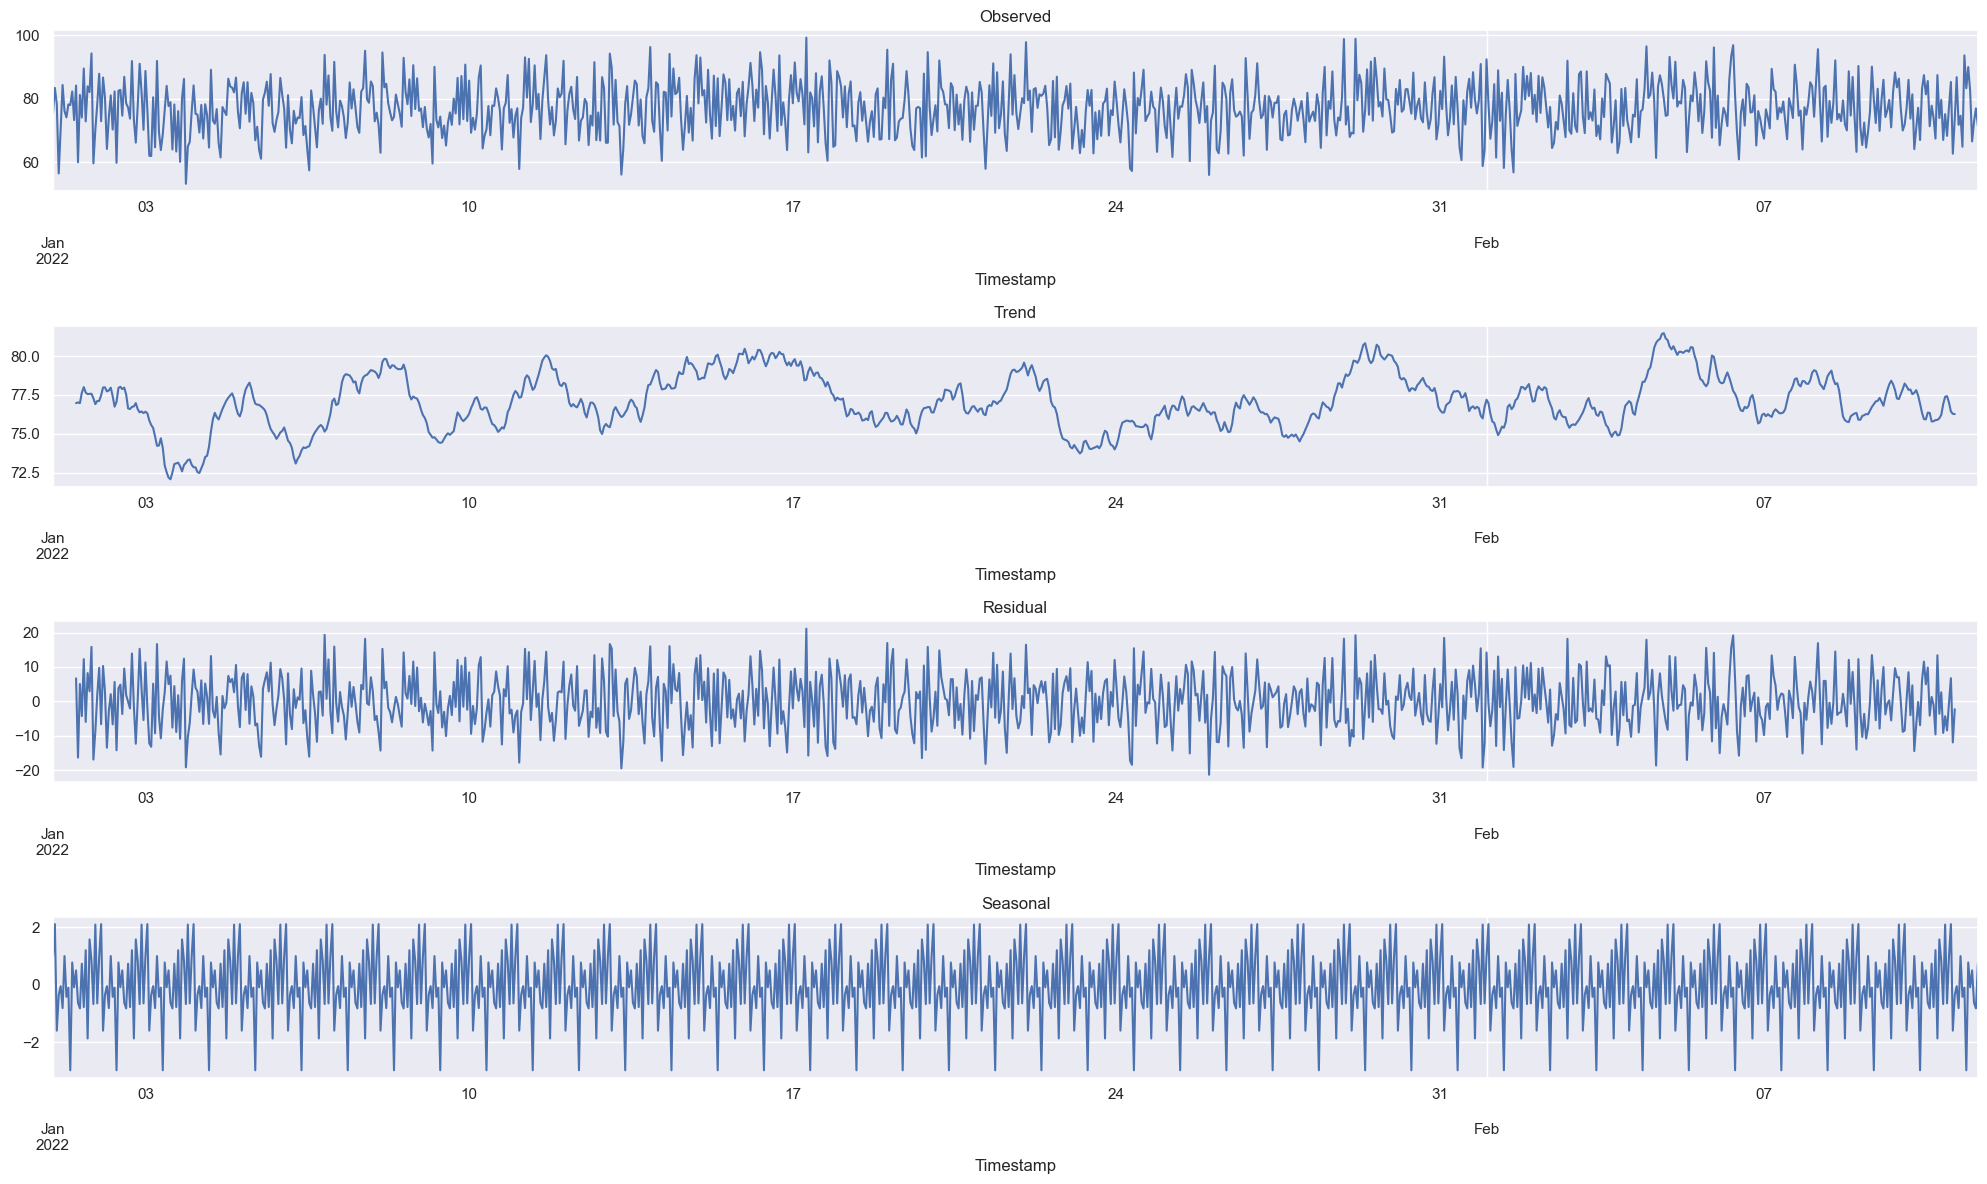

In [20]:
import statsmodels.api as sm  # statsmodels for time series analysis
res = sm.tsa.seasonal_decompose(dff['EnergyConsumption'], model='additive')


fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
res.observed.plot(ax=ax1, title='Observed')
res.trend.plot(ax=ax2, title='Trend')
res.resid.plot(ax=ax3, title='Residual')
res.seasonal.plot(ax=ax4, title='Seasonal')
plt.tight_layout()
plt.show()


In [21]:
# def show_raw_visualization(datam nrows, width, height):

#     fig, ax = plt.subplots(
#         nrows=nrows, ncols=2 figsize= (width,height), dpi=80, facecolor='w', edgcolor = 'K'
#     )
#     for i in range(len(feature_keys)):
#         key = feature_keys[i]
#         c = colors[i %(len(colors))]
#         t_data = data[key]
#         t_data.index = data.index
#         t_data.head()
#         ax = t_data.plot(
#             ax=axes[i //2, i%2],
#             color = c;
#             title= "{} - {}".format(key, titles[i]),
#             rot= 25,
#         )
#         ax.legend([titles[i]])
#     plt.tight_layout()
    

In [22]:
def show_raw_visualization(data, nrows, width, height):
    fig, axes = plt.subplots(
        nrows=nrows, ncols=2, figsize=(width, height), dpi=80, facecolor='w', edgecolor='k'
    )
    
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % len(colors)]
        t_data = data[key]
        t_data.index = data.index
        
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(key, titles[i]),
            rot=25,
        )
        ax.legend([titles[i]])
    
    plt.tight_layout()
    plt.show()


In [23]:
colors = ['blue','orange', 'green', 'red']
titles = ['Temperature', 'Humidity', 'EnergyConsumption', "RenewableEnergy "]

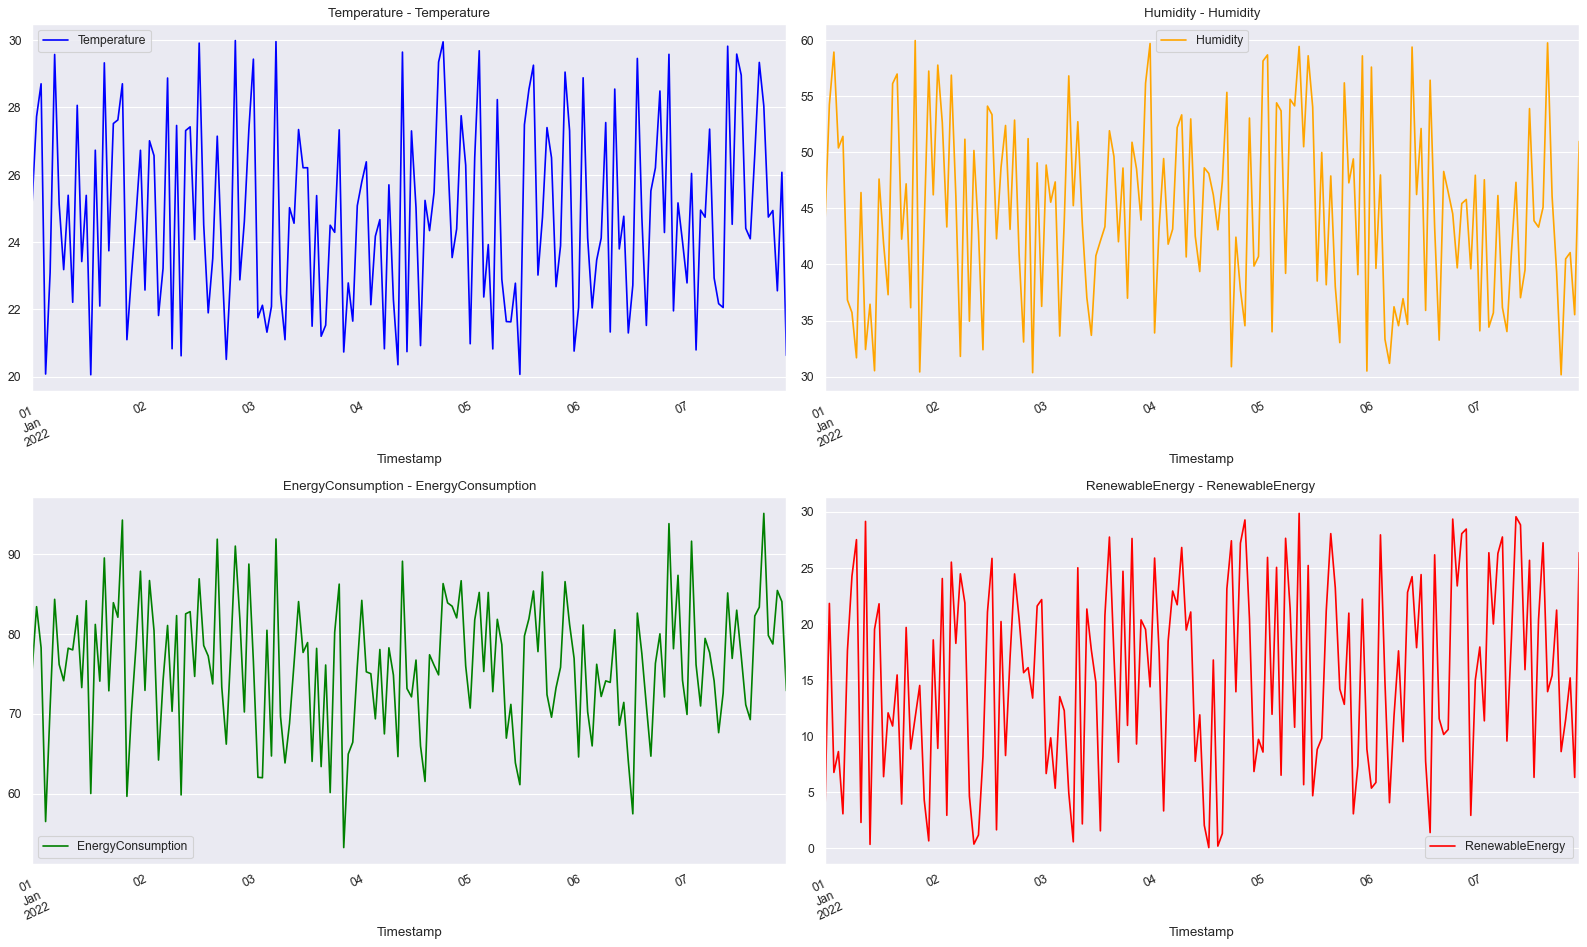

In [24]:
feature_keys = ['Temperature', 'Humidity', 'EnergyConsumption', 'RenewableEnergy']
show_raw_visualization(dff[:24*7], nrows=2, width=20, height=12)


In [25]:
dff.isnull().sum().sum()

0

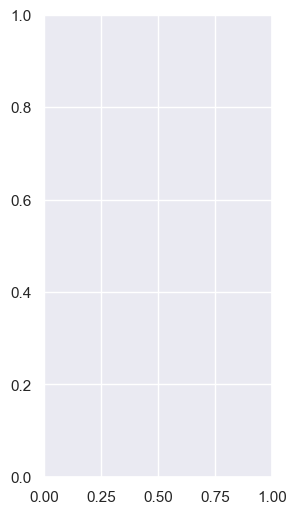

In [26]:
plt.figure(figsize=(10, 6))
plt.subplot(1,3,1)
plt.show()

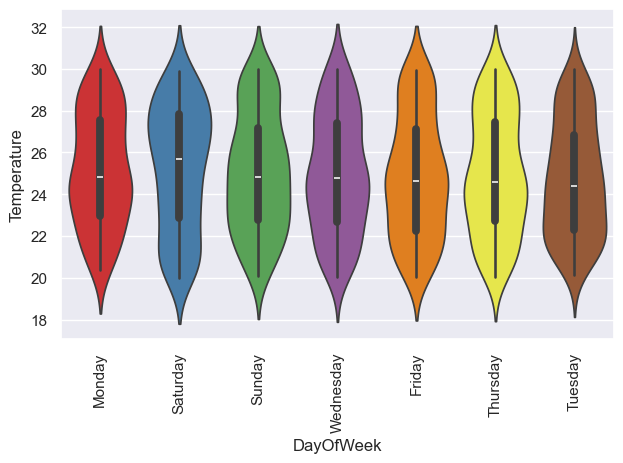

In [27]:
sns.violinplot(x = 'DayOfWeek', y = 'Temperature', data=dff, palette='Set1')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()



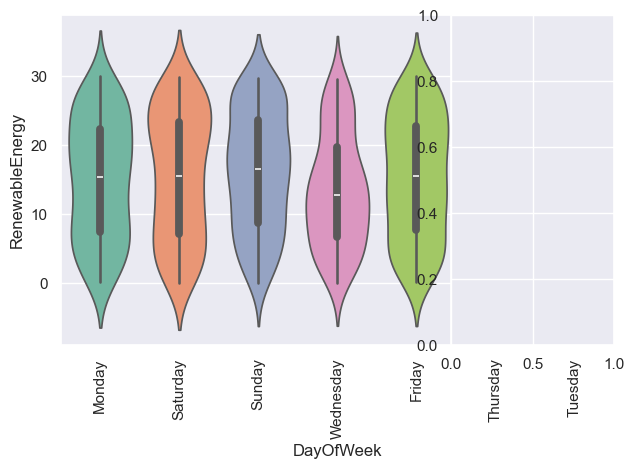

In [28]:
sns.violinplot(x ='DayOfWeek', y = "RenewableEnergy", data = dff , palette='Set2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.subplot(1,3,3)
plt.show()

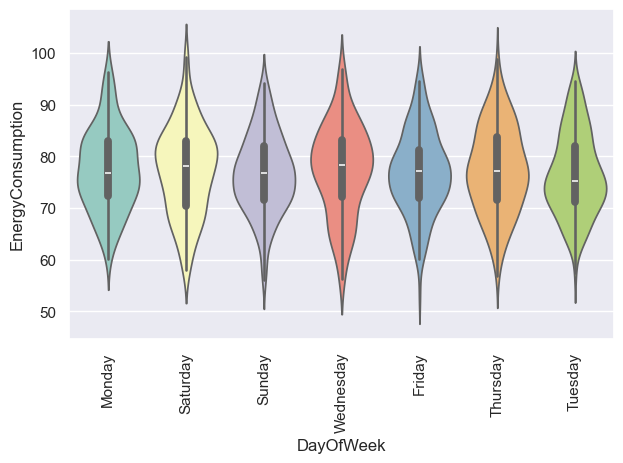

In [29]:
sns.violinplot(x = 'DayOfWeek', y = 'EnergyConsumption', data=dff, palette='Set3')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


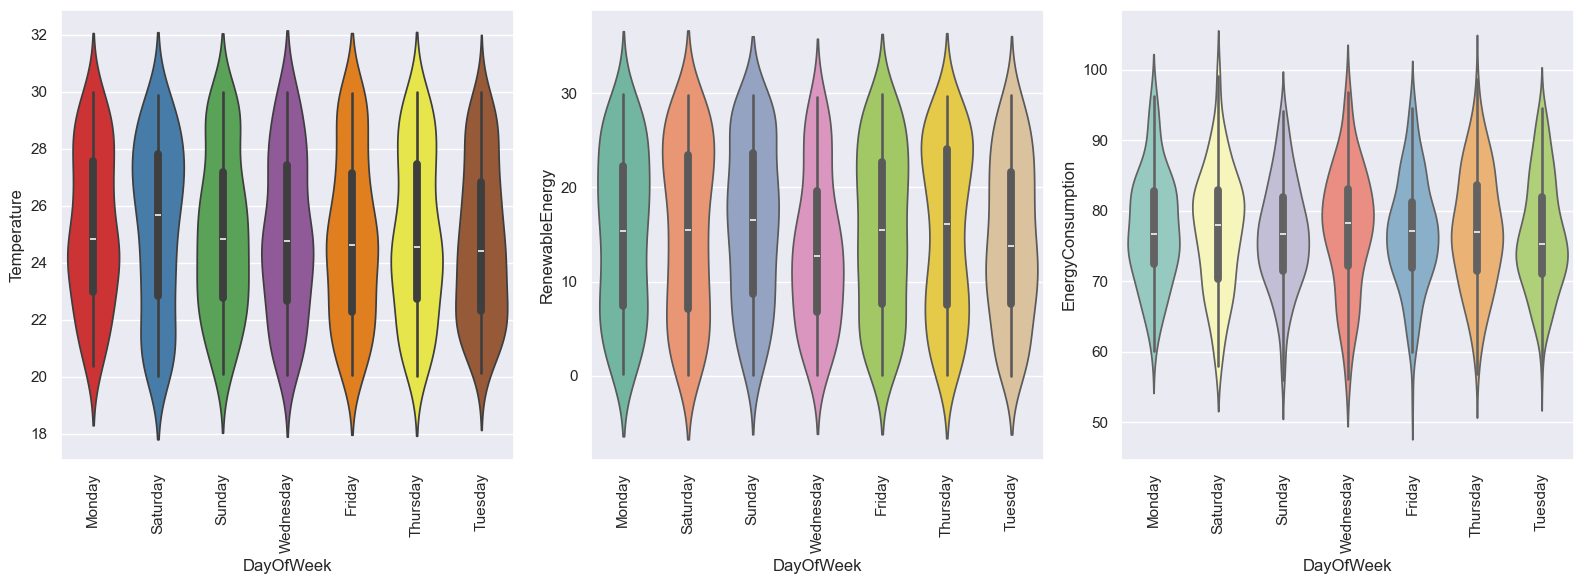

In [30]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.violinplot(x = 'DayOfWeek', y = 'Temperature', data = dff, palette='Set1' )
plt.xticks(rotation=90)
plt.tight_layout()
plt.subplot(1,3,2)
sns.violinplot(x = 'DayOfWeek', y = 'RenewableEnergy', data = dff, palette='Set2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.subplot(1,3,3)
sns.violinplot(x = 'DayOfWeek', y = 'EnergyConsumption', data = dff, palette='Set3')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [31]:
import plotly.express as px
import plotly.figure_factory as ff

fig = px.box(data_frame = dff, x = "EnergyConsumption", width = 1000, height = 300)
fig.update_layout({"template": "plotly_dark",})
fig.show()

In [32]:
fig = px.box(data_frame = dff, x = "RenewableEnergy", width = 1000, height = 300)
fig.update_layout({"template": "plotly_dark",})
fig.show()

In [33]:
fig = px.box(data_frame = dff, x = 'Temperature', width = 1000, height = 300)
fig.update_layout({"template": "plotly_dark",})
fig.show()

In [34]:
cat = dff.select_dtypes(include="object")
cat

,HVACUsage,LightingUsage,DayOfWeek,Holiday
Timestamp,,,,
2022-01-01 00:00:00+00:00,On,Off,Monday,No
2022-01-01 01:00:00+00:00,On,On,Saturday,No
2022-01-01 02:00:00+00:00,Off,Off,Sunday,No
2022-01-01 03:00:00+00:00,Off,On,Wednesday,No
2022-01-01 04:00:00+00:00,On,Off,Friday,No
...,...,...,...,...
2022-02-11 11:00:00+00:00,Off,Off,Saturday,No
2022-02-11 12:00:00+00:00,Off,On,Tuesday,Yes
2022-02-11 13:00:00+00:00,Off,On,Friday,Yes


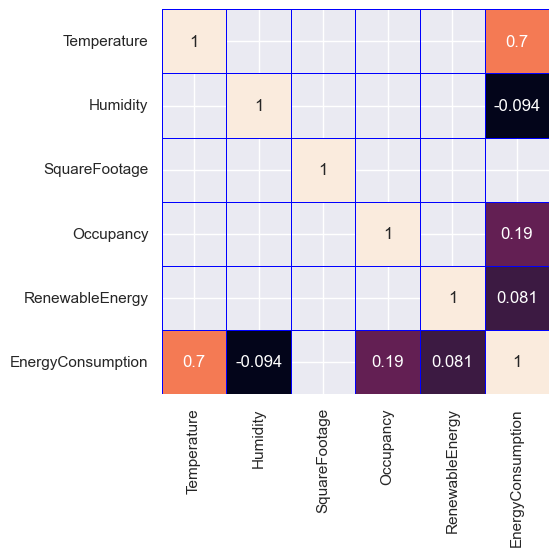

In [35]:
df=dff.drop(cat,axis=1).corr()
plt.figure(figsize=(5, 5))
sns.heatmap(df[(df>0.05)|(df<-0.05)],annot=True,cbar=False,linewidth=0.5,linecolor='blue')
plt.show();

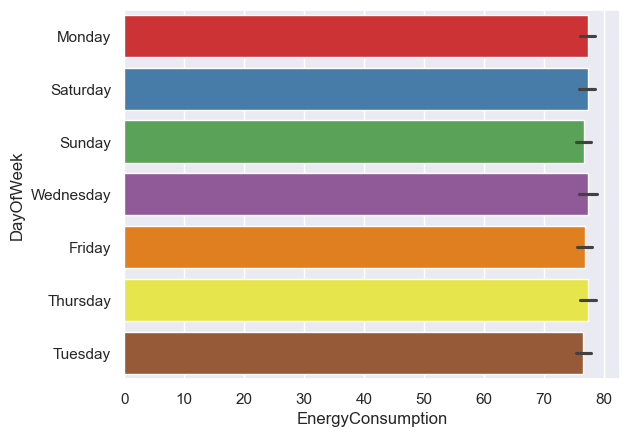

In [36]:
sns.barplot(data = dff, y ='DayOfWeek', x = 'EnergyConsumption', palette='Set1')
plt.show()

In [37]:
df.EnergyConsumption.skew()

0.9810996914786819

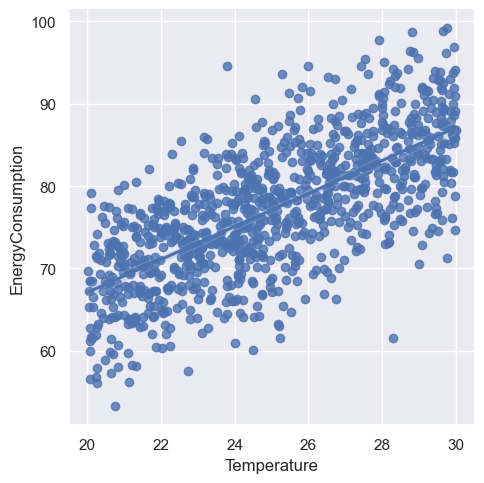

In [38]:
sns.lmplot(x= "Temperature", y = "EnergyConsumption", data = dff, palette='Set1')
plt.show()

In [39]:
df.dtypes

Temperature          float64
Humidity             float64
SquareFootage        float64
Occupancy            float64
RenewableEnergy      float64
EnergyConsumption    float64
dtype: object

In [40]:
df.columns

Index(['Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'RenewableEnergy', 'EnergyConsumption'],
      dtype='object')

In [41]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()  

object_cols = cat
for col in object_cols:
    label_encoder.fit(dff[col])
    dff[col]= label_encoder.transform(dff[col])


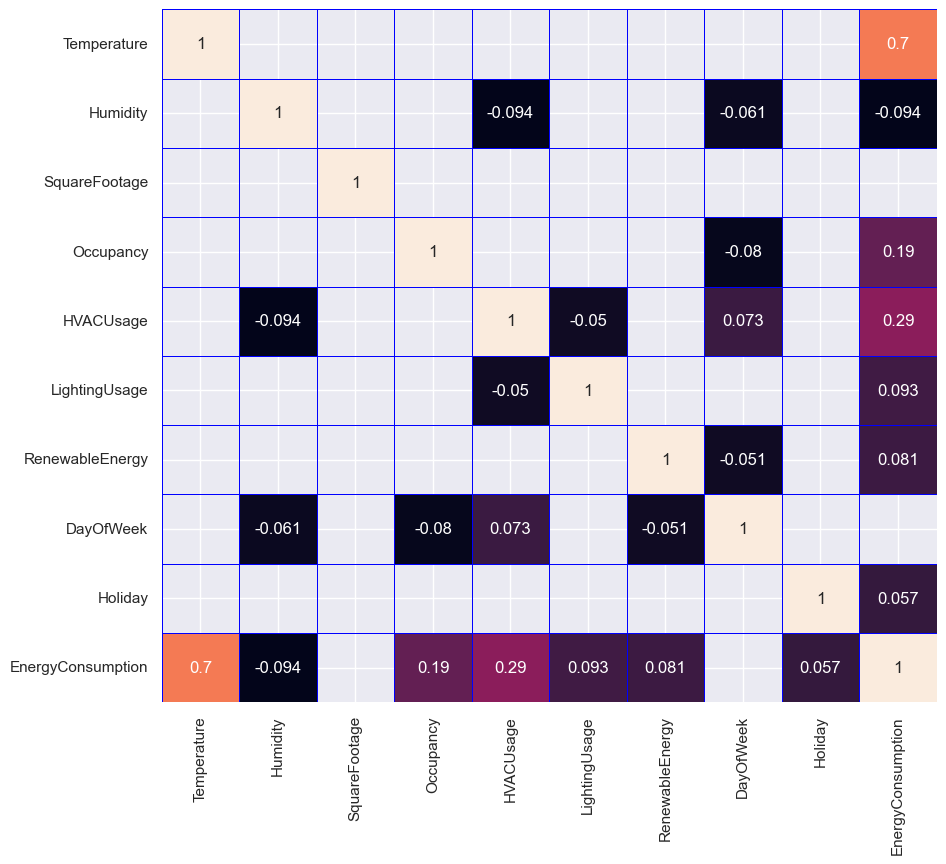

In [42]:
df = dff.corr()
plt.figure(figsize=(10, 9))
sns.heatmap(df[(df>0.05)|(df<-0.05)], annot=True, cbar=False, linewidth=0.5, linecolor='blue')
plt.show()

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

n_splits = 5

Kf = TimeSeriesSplit(n_splits=n_splits)
features = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday']

mae_scores = []
for train_idx, val_idx, in Kf.split(dff):
    x_train, x_val = dff[features].iloc[train_idx], dff[features].iloc[val_idx]
    y_train, y_val = dff["EnergyConsumption"].iloc[train_idx], dff["EnergyConsumption"].iloc[val_idx]

    model = XGBRegressor(enable_categorical = True)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)

    mae = mean_absolute_error(y_val, y_pred)
    mae_scores.append(mae)
    
mae = np.array(mae_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)

print(f"\033[031m\033[1m")
print("MAE Scores for each fold:", mae_scores)
print(f"\033[034m\033[1m")
print(f"Mean MAE: {mean_mae :.2f} ± {std_mae:.2f}")




MAE Scores for each fold: [4.797893235306629, 4.701583017071006, 4.974918264280155, 4.548049330667156, 4.443521552781618]

Mean MAE: 4.69 ± 0.19


In [56]:
from sklearn.model_selection import TimeSeriesSplit
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
n_splits = 5

Kf = TimeSeriesSplit(n_splits=n_splits)
features = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday']

best_params = {
    'n_iter': 200,
    'verbosity': -1,
    'colsample_bytree': 0.989,
    'colsample_bynode': 0.747,
    'max_depth': 8,
    'learning_rate': 0.098,
    'lambda_l1': 0.485,
    'lambda_l2': 0.418,
    'num_leaves': 159,
    'min_data_in_leaf' : 4,
}

mae_scores = []
for train_idx, val_idx in Kf.split(dff):
       x_train, x_val = dff[features].iloc[train_idx], dff[features].iloc[val_idx]
       y_train, y_val = dff["EnergyConsumption"].iloc[train_idx], dff["EnergyConsumption"].iloc[val_idx]

       model = LGBMRegressor(**best_params)
       model.fit(x_train, y_train)
       y_pred = model.predict(x_val)

       mae = mean_absolute_error(y_val, y_pred)
       mae_scores.append(mae)

mea_scores = np.array(mae_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)

print(f'\033[031m\033[1m')
print("MAE Scores for each fold:", mae_scores)
print(f'\033[034m\033[1m')
print(f'Mean MAE: {mean_mae :.2f} ± {std_mae:.2f}')
               


MAE Scores for each fold: [4.4877155440628504, 4.689827330658808, 5.057134754723052, 4.4554097161009265, 4.550154654787954]

Mean MAE: 4.65 ± 0.22


In [57]:
df

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Temperature,1.000000,-0.034032,0.004551,-0.003490,0.001237,0.009446,-0.001350,-0.018714,0.026893,0.696410
Humidity,-0.034032,1.000000,-0.014651,0.004766,-0.094017,-0.022207,0.002052,-0.061004,-0.033733,-0.093583
SquareFootage,0.004551,-0.014651,1.000000,0.009696,0.018244,-0.016915,0.022196,0.049412,-0.027951,-0.001129
Occupancy,-0.003490,0.004766,0.009696,1.000000,0.012674,-0.012062,0.013680,-0.080218,0.029863,0.186580
HVACUsage,0.001237,-0.094017,0.018244,0.012674,1.000000,-0.050303,0.016219,0.073383,0.033020,0.286464
LightingUsage,0.009446,-0.022207,-0.016915,-0.012062,-0.050303,1.000000,-0.029295,-0.008190,0.042913,0.093423
RenewableEnergy,-0.001350,0.002052,0.022196,0.013680,0.016219,-0.029295,1.000000,-0.050636,-0.035892,0.081160
DayOfWeek,-0.018714,-0.061004,0.049412,-0.080218,0.073383,-0.008190,-0.050636,1.000000,0.012257,-0.002291
Holiday,0.026893,-0.033733,-0.027951,0.029863,0.033020,0.042913,-0.035892,0.012257,1.000000,0.056676
EnergyConsumption,0.696410,-0.093583,-0.001129,0.186580,0.286464,0.093423,0.081160,-0.002291,0.056676,1.000000
